# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [754]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly


In [49]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [50]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [51]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/11/21  6/12/21  6/13/21  \
0        0        0        0        0  ...    87716    88740    89861   
1        0        0        0        0  ...   132437   132449   132459   
2        0        0        0        0  ...   132727   133070   133388   
3        0        0        0        0  ...    13813    13813    13813   
4        0        0        0        0  ...    36455    36600    36705   

   6/14/21  6/15/21  6/16/21  6/17/21  6/18/21  6/19/21  6/20/21  
0    91458    93272    93288    96531    98734    98734    98734  
1   132461   132469   132476   132481   132484   132488   132490  
2   133742   134115   134458   134840   135219   135586   135821  
3    13826    13828    13836    13839    13842    13842    13842  
4    36790    36921    37094    37289    37467    37604    37678  

[5 rows x 520 columns]

In [4]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/11/21  6/12/21  6/13/21  \
0        0        0        0        0  ...     3412     3449     3527   
1        0        0        0        0  ...     2453     2453     2453   
2        0        0        0        0  ...     3560     3565     3571   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      819      825      831   

   6/14/21  6/15/21  6/16/21  6/17/21  6/18/21  6/19/21  6/20/21  
0     3612     3683     3683     3842     3934     3934     3934  
1     2453     2454     2454     2454     2454     2454     2454  
2     3579     3588     3598     3605     3615     3624     3631  
3      127      127      127      127      127      127      127  
4      836      842      847      851      853      856      859  

[5 rows x 520 columns]

In [5]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/11/21  6/12/21  6/13/21  \
0        0        0        0        0  ...    60598    60939    61410   
1        0        0        0        0  ...   129807   129826   129842   
2        0        0        0        0  ...    92384    92620    92852   
3        0        0        0        0  ...    13591    13591    13591   
4        0        0        0        0  ...    30101    30207    30282   

   6/14/21  6/15/21  6/16/21  6/17/21  6/18/21  6/19/21  6/20/21  
0    61706    61820    62397    62698    63426    63875    64401  
1   129865   129879   129888   129895   129903   129910   129918  
2    93094    93355    93586    93831    94093    94336    94571  
3    13618    13626    13633    13640    13650    13650    13650  
4    30359    30775    31003    31105    31569    31589    31676  

[5 rows x 520 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
total_cases= confirmed.sum()
total_deaths= deaths.sum()
total_recovered= recoveries.sum()
total_active = total_cases - total_deaths - total_recovered 

In [12]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  178487369
Total death cases:  3866158
Total recoveries cases:  116446787
Total active cases:  58174424


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [13]:
dict_1={"Total_Cases": total_cases, "Total_Deaths": total_deaths, 
        "Total_Recovered": total_recovered, "Total_Active": total_active}
df=pd.DataFrame(data=dict_1)
df.head()

Total_Cases  Total_Deaths  Total_Recovered  Total_Active
1/22/20          557            17               30           510
1/23/20          655            18               32           605
1/24/20          941            26               39           876
1/25/20         1433            42               42          1349
1/26/20         2118            56               56          2006

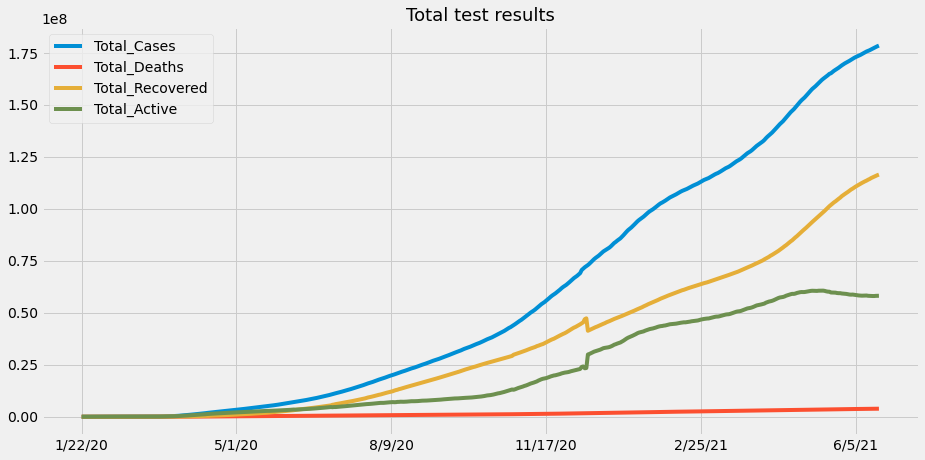

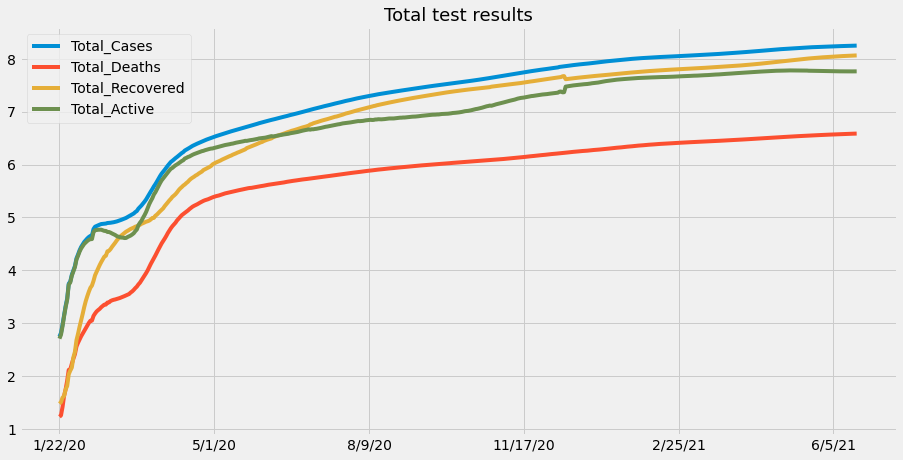

In [14]:
#Insert your code here:
df.plot(kind="line",figsize=(14,7))
plt.title("Total test results",fontsize=18)
plt.show()

# visualize the number with log(10)
df.apply(np.log10).plot(kind="line",figsize=(14,7))
plt.title("Total test results",fontsize=18)
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

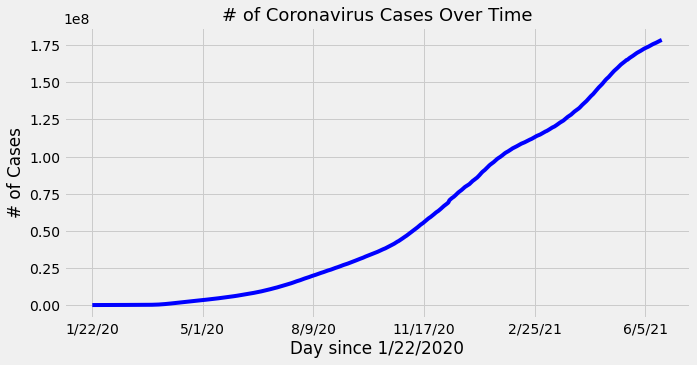

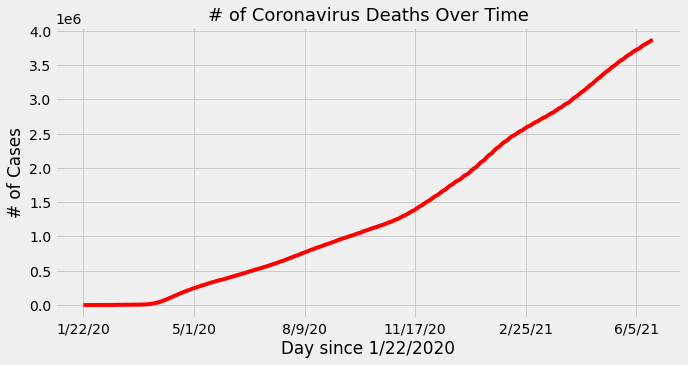

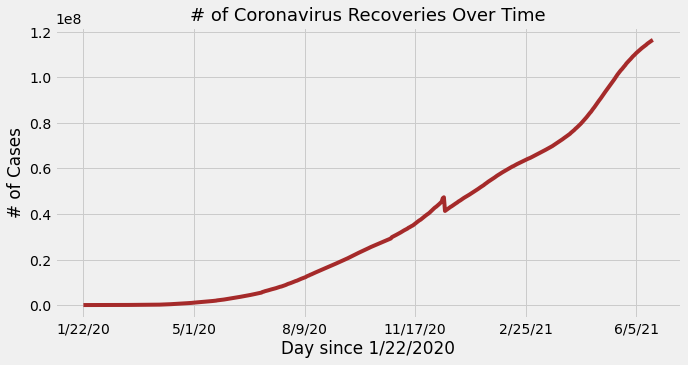

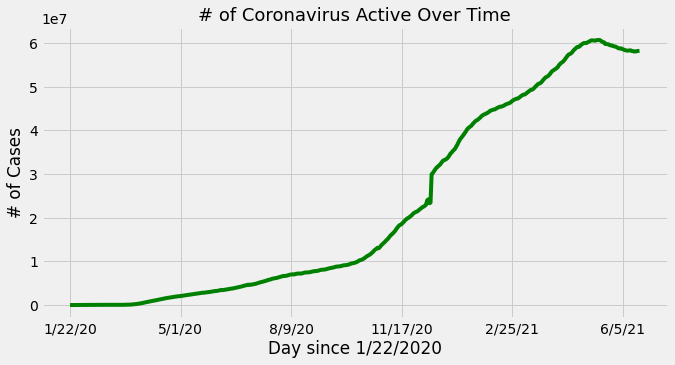

In [15]:
#Insert your code here:
# Total Cases
df["Total_Cases"].plot(kind="line",figsize=(10,5),color="blue")
plt.title("# of Coronavirus Cases Over Time",fontsize=18)
plt.ylabel("# of Cases")
plt.xlabel("Day since 1/22/2020")
plt.show()

# Total Deaths
df["Total_Deaths"].plot(kind="line",figsize=(10,5),color="Red")
plt.title("# of Coronavirus Deaths Over Time",fontsize=18)
plt.ylabel("# of Cases")
plt.xlabel("Day since 1/22/2020")
plt.show()

# Total Recoveries
df["Total_Recovered"].plot(kind="line",figsize=(10,5),color="brown")
plt.title("# of Coronavirus Recoveries Over Time",fontsize=18)
plt.ylabel("# of Cases")
plt.xlabel("Day since 1/22/2020")
plt.show()

# Total Active
df["Total_Active"].plot(kind="line",figsize=(10,5),color="Green")
plt.title("# of Coronavirus Active Over Time",fontsize=18)
plt.ylabel("# of Cases")
plt.xlabel("Day since 1/22/2020")
plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [16]:
#Insert your code here:
def daily_increase(df):
    d=[]
    for i in range(len(df)):
        if i==0:
            d.append(df[0])
        else:
            d.append(df[i]-df[i-1])
    return d              

df["Daily_increase"]=daily_increase(df["Total_Cases"])
df["Daily_Increase_Deaths"]=daily_increase(df["Total_Deaths"])
df["Daily_Increase_Recoveries"]=daily_increase(df["Total_Recovered"])
df["Daily_Increase_Active"]=daily_increase(df["Total_Active"])

df.head()

Total_Cases  Total_Deaths  Total_Recovered  Total_Active  \
1/22/20          557            17               30           510   
1/23/20          655            18               32           605   
1/24/20          941            26               39           876   
1/25/20         1433            42               42          1349   
1/26/20         2118            56               56          2006   

         Daily_increase  Daily_Increase_Deaths  Daily_Increase_Recoveries  \
1/22/20             557                     17                         30   
1/23/20              98                      1                          2   
1/24/20             286                      8                          7   
1/25/20             492                     16                          3   
1/26/20             685                     14                         14   

         Daily_Increase_Active  
1/22/20                    510  
1/23/20                     95  
1/24/20                    271  
1/25/20                    473  
1/26/20                    657

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

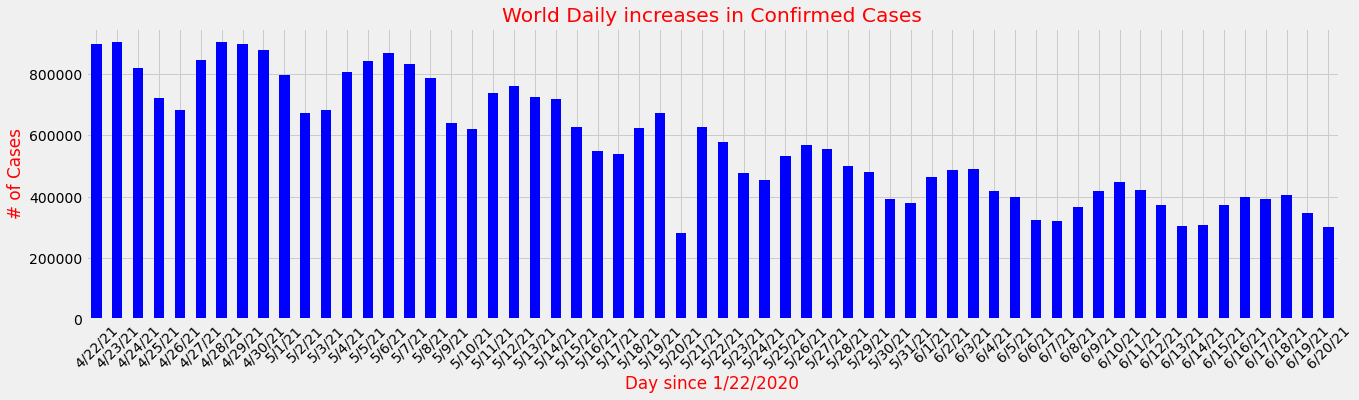

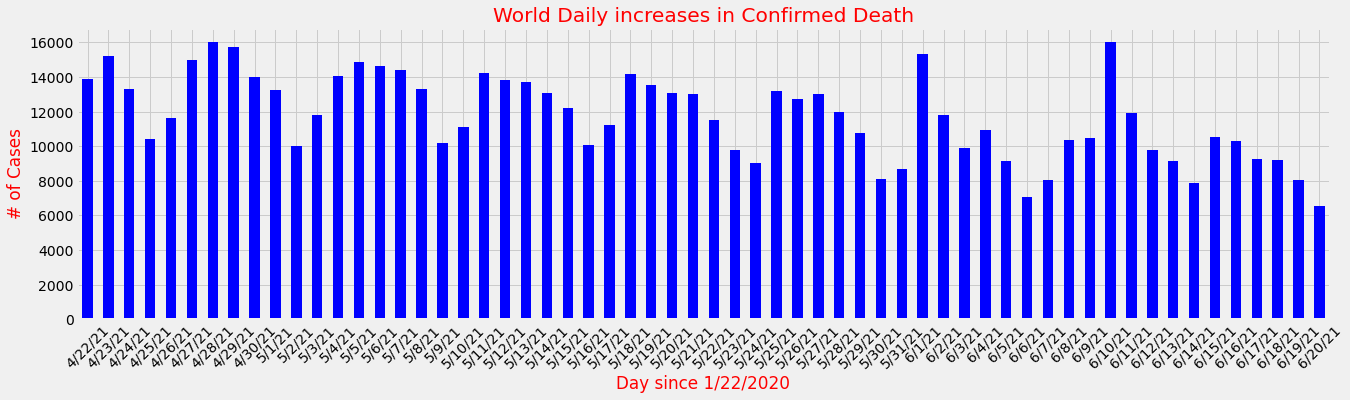

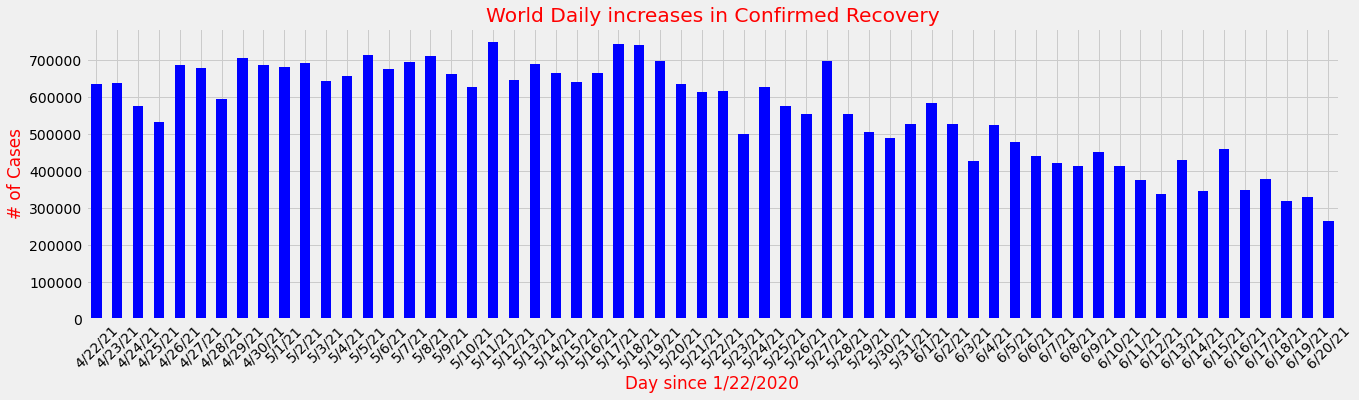

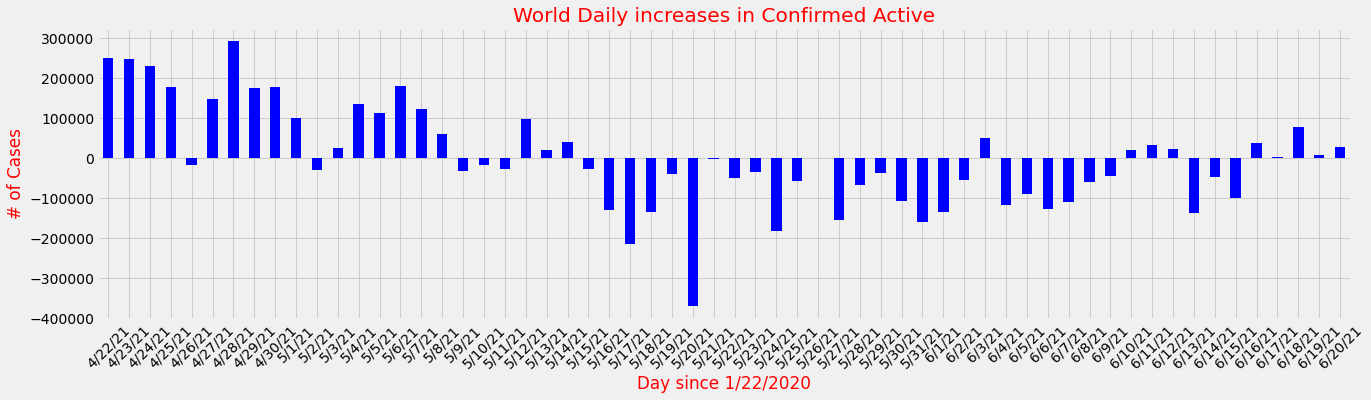

In [17]:
#Insert your code here:

# world Daily increses in confirmed Cases:
df["Daily_increase"].tail(60).plot(kind="bar",figsize=(20,5),color="blue",rot=45)
plt.title("World Daily increases in Confirmed Cases",color="Red")
plt.ylabel("# of Cases",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.show()

# World Daily increases in Confirmed Death 
df["Daily_Increase_Deaths"].tail(60).plot(kind="bar",figsize=(20,5),color="blue",rot=45)
plt.title("World Daily increases in Confirmed Death",color="Red")
plt.ylabel("# of Cases",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.show()

# World Daily increases in Confirmed Recoveries
df["Daily_Increase_Recoveries"].tail(60).plot(kind="bar",figsize=(20,5),color="blue",rot=45)
plt.title("World Daily increases in Confirmed Recovery",color="Red")
plt.ylabel("# of Cases",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.show()

# World Daily increases in Confirmed Active
df["Daily_Increase_Active"].tail(60).plot(kind="bar",figsize=(20,5),color="blue",rot=45)
plt.title("World Daily increases in Confirmed Active", color="Red")
plt.ylabel("# of Cases",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.show()


# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [18]:
#Insert your code here:
df_2=pd.DataFrame()
df_2["Mortality_rate"]= round((total_deaths/total_cases)*100,2)
df_2["Recovery_rate"] = round((total_recovered/total_cases)*100,2)

df_2.tail()

Mortality_rate  Recovery_rate
6/16/21            2.17          65.04
6/17/21            2.17          65.11
6/18/21            2.17          65.14
6/19/21            2.17          65.20
6/20/21            2.17          65.24

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

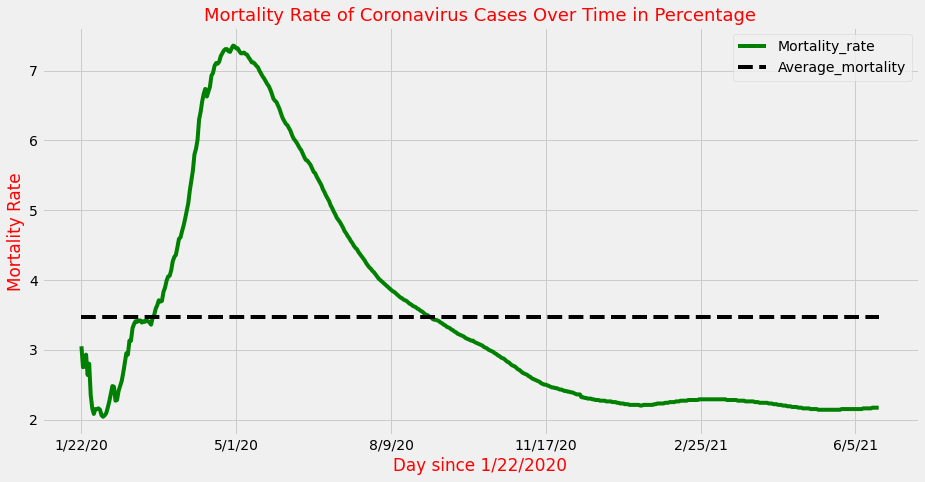

In [19]:
#Insert your code here:

# Calculate average mortality rate
df_2["Average_mortality"]= df_2["Mortality_rate"].mean()

# Visualize
df_2.Mortality_rate.plot(kind="line",color="green",figsize=(14,7),)
df_2.Average_mortality.plot(kind="line",color="black", linestyle="dashed")

plt.title("Mortality Rate of Coronavirus Cases Over Time in Percentage",fontsize=18, color="Red")
plt.ylabel("Mortality Rate",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.legend()

**7.2** 

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

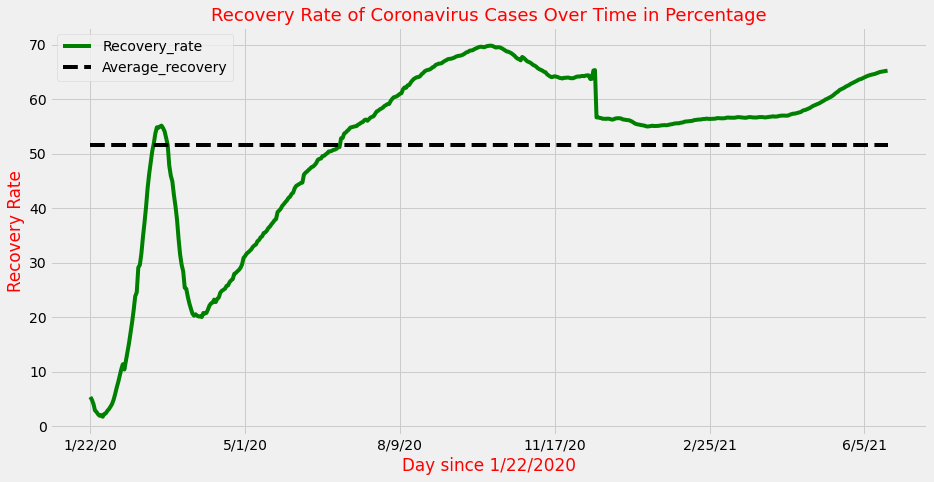

In [20]:
#Insert your code here:

# Calculate average mortality rate
df_2["Average_recovery"]= df_2["Recovery_rate"].mean()

# Visualize
df_2.Recovery_rate.plot(kind="line",color="green",figsize=(14,7),)
df_2.Average_recovery.plot(kind="line",color="black", linestyle="dashed")

plt.title("Recovery Rate of Coronavirus Cases Over Time in Percentage",fontsize=18, color="Red")
plt.ylabel("Recovery Rate",color="Red")
plt.xlabel("Day since 1/22/2020",color="Red")
plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [21]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [22]:
#Insert your code here:
confirmed_df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"Continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
recoveries_df.insert(2,"Continent",  [continents[country_to_continent_code(country)] for country in countries2[:]])

confirmed_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  6/11/21  6/12/21  6/13/21  \
0        0        0        0        0  ...    87716    88740    89861   
1        0        0        0        0  ...   132437   132449   132459   
2        0        0        0        0  ...   132727   133070   133388   
3        0        0        0        0  ...    13813    13813    13813   
4        0        0        0        0  ...    36455    36600    36705   

   6/14/21  6/15/21  6/16/21  6/17/21  6/18/21  6/19/21  6/20/21  
0    91458    93272    93288    96531    98734    98734    98734  
1   132461   132469   132476   132481   132484   132488   132490  
2   133742   134115   134458   134840   135219   135586   135821  
3    13826    13828    13836    13839    13842    13842    13842  
4    36790    36921    37094    37289    37467    37604    37678  

[5 rows x 521 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Confirms: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [23]:
# câu này thiếu lat,long,continent

In [24]:
#Insert your code here:
countries_df=pd.DataFrame()

# Tính tổng theo country
countries_confirmed= confirmed_df.groupby(by='Country/Region').aggregate(np.sum)
countries_recoveries=recoveries_df.groupby(by='Country/Region').aggregate(np.sum)
countries_deaths=deaths_df.groupby(by='Country/Region').aggregate(np.sum)

# add column vào countries_df
countries_df["Confirmed"]=countries_confirmed.iloc[:,-1]
countries_df["Deaths"]=countries_deaths.iloc[:,-1]
countries_df["Recoveries"]=countries_recoveries.iloc[:,-1]
countries_df["Active"]=countries_df["Confirmed"]- countries_df["Recoveries"]- countries_df["Deaths"]
countries_df["Mortality_Rate"]= round((countries_df["Deaths"]/countries_df["Confirmed"] *100),2)

countries_df

Confirmed  Deaths  Recoveries  Active  Mortality_Rate
Country/Region                                                           
Afghanistan             98734    3934       64401   30399            3.98
Albania                132490    2454      129918     118            1.85
Algeria                135821    3631       94571   37619            2.67
Andorra                 13842     127       13650      65            0.92
Angola                  37678     859       31676    5143            2.28
...                       ...     ...         ...     ...             ...
Vietnam                 13258      66        5229    7963            0.50
West Bank and Gaza     312673    3551      306240    2882            1.14
Yemen                    6885    1355        3953    1577           19.68
Zambia                 129033    1644      108960   18429            1.27
Zimbabwe                41779    1672       37184    2923            4.00

[194 rows x 5 columns]

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [25]:
#Insert your code here:
continents_df=pd.DataFrame()

# Tính tổng theo continent
continent_confirmed= confirmed_df.groupby(by='Continent').aggregate(np.sum)
continent_recoveries= recoveries_df.groupby(by='Continent').aggregate(np.sum)
continent_deaths= deaths_df.groupby(by='Continent').aggregate(np.sum)

# Add columns vào continents_df
continents_df["Confirmed"]=continent_confirmed.iloc[:,-1]
continents_df["Deaths"]=continent_deaths.iloc[:,-1]
continents_df["Recoveries"]=continent_recoveries.iloc[:,-1]
continents_df["Active"]=continents_df["Confirmed"]- continents_df["Recoveries"]- continents_df["Deaths"]
continents_df["Mortality Rate"]= round((continents_df["Deaths"]/continents_df["Confirmed"] *100),2)

continents_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
Continent                                                              
Africa           5201576   137461     4573424    490691            2.64
Asia            54065441   759474    51238499   2067468            1.40
Australia          52009     1117       43226      7666            2.15
Europe          47557123  1092501    26676173  19788449            2.30
North America   39418814   895792     4935422  33587600            2.27
Others            577342     9102      553193     15047            1.58
South America   31615064   970711    28426850   2217503            3.07

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [26]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          Continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    print(Continent)
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if Continent != None:
        params = ["Continent",Continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else: 
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    #plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

Africa
Asia
Australia
Europe
North America
Others
South America


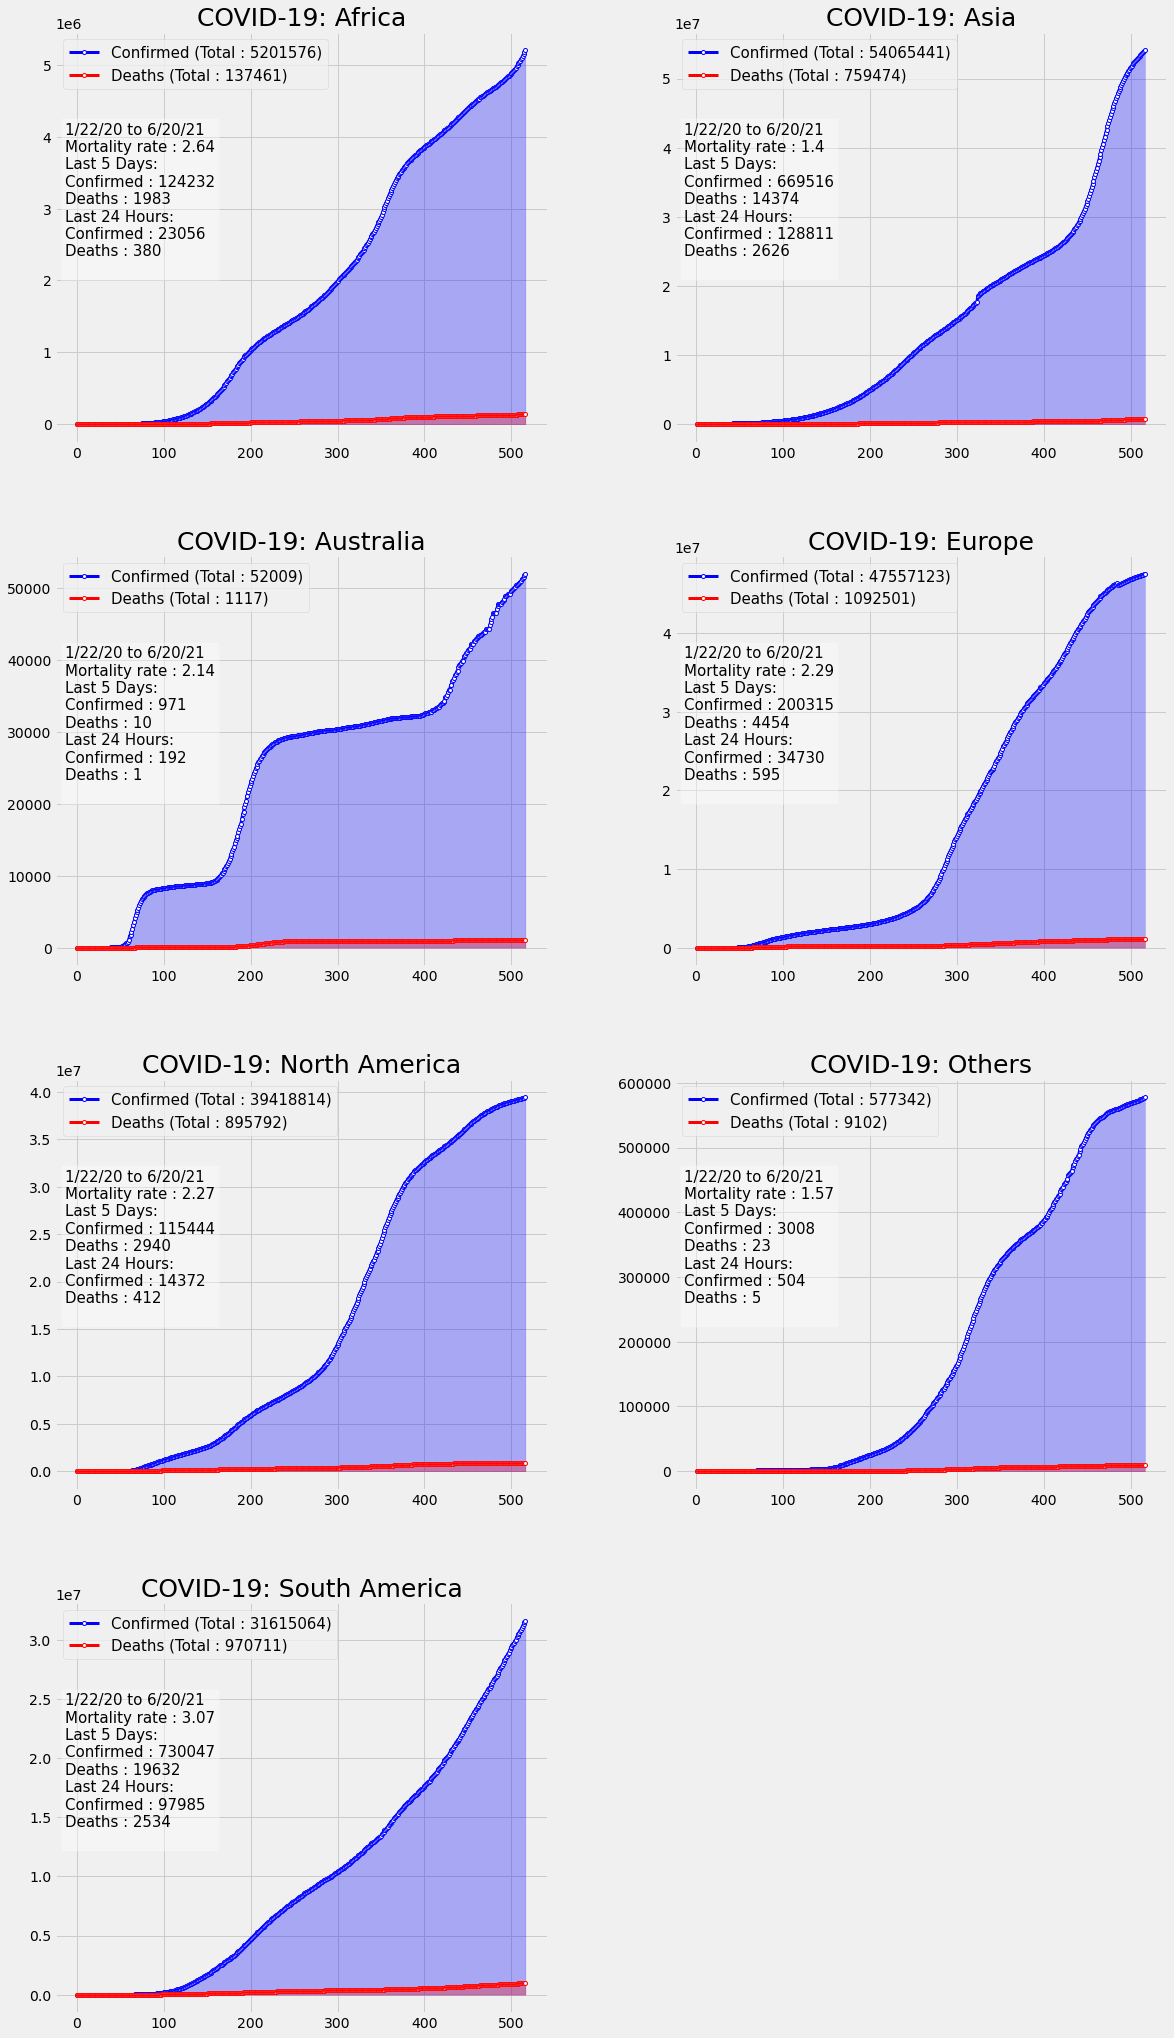

In [27]:
# lấy continents_list
df_continents = confirmed_df.groupby(["Continent"]).sum()

df_contients = df_continents.sort_values(df_continents.columns[-1],ascending = False)
continents_list = df_continents.index

cols = 2
rows = round(continents_list.shape[0]/cols)
f = plt.figure(figsize=(20,8*rows))

for i,cont in enumerate(continents_list):
    visualize_covid_cases(confirmed_df, deaths_df,
                          Continent= cont , country = None , state = None, period = None, 
                          figure = [f,rows,cols, i+1],
                          scale = "linear")
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [28]:
#Insert your code here:

# Fix function:
def visualize_covid_cases_2(confirmed, deaths, recovers,
                          Continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    print(Continent)
    stats = [confirmed, deaths, recovers]
    label = ["Confirmed", "Deaths","Recovered"]
    if Continent != None:
        params = ["Continent",Continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else: 
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recovered=np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recovered= np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[7]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recovered : " + str(Total_recovered[-1] - Total_recovered[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recovered : " + str(Total_recovered[-1] - Total_recovered[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+" - "+recoveries_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    #plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()



Africa
Asia
Australia
Europe
North America
Others
South America


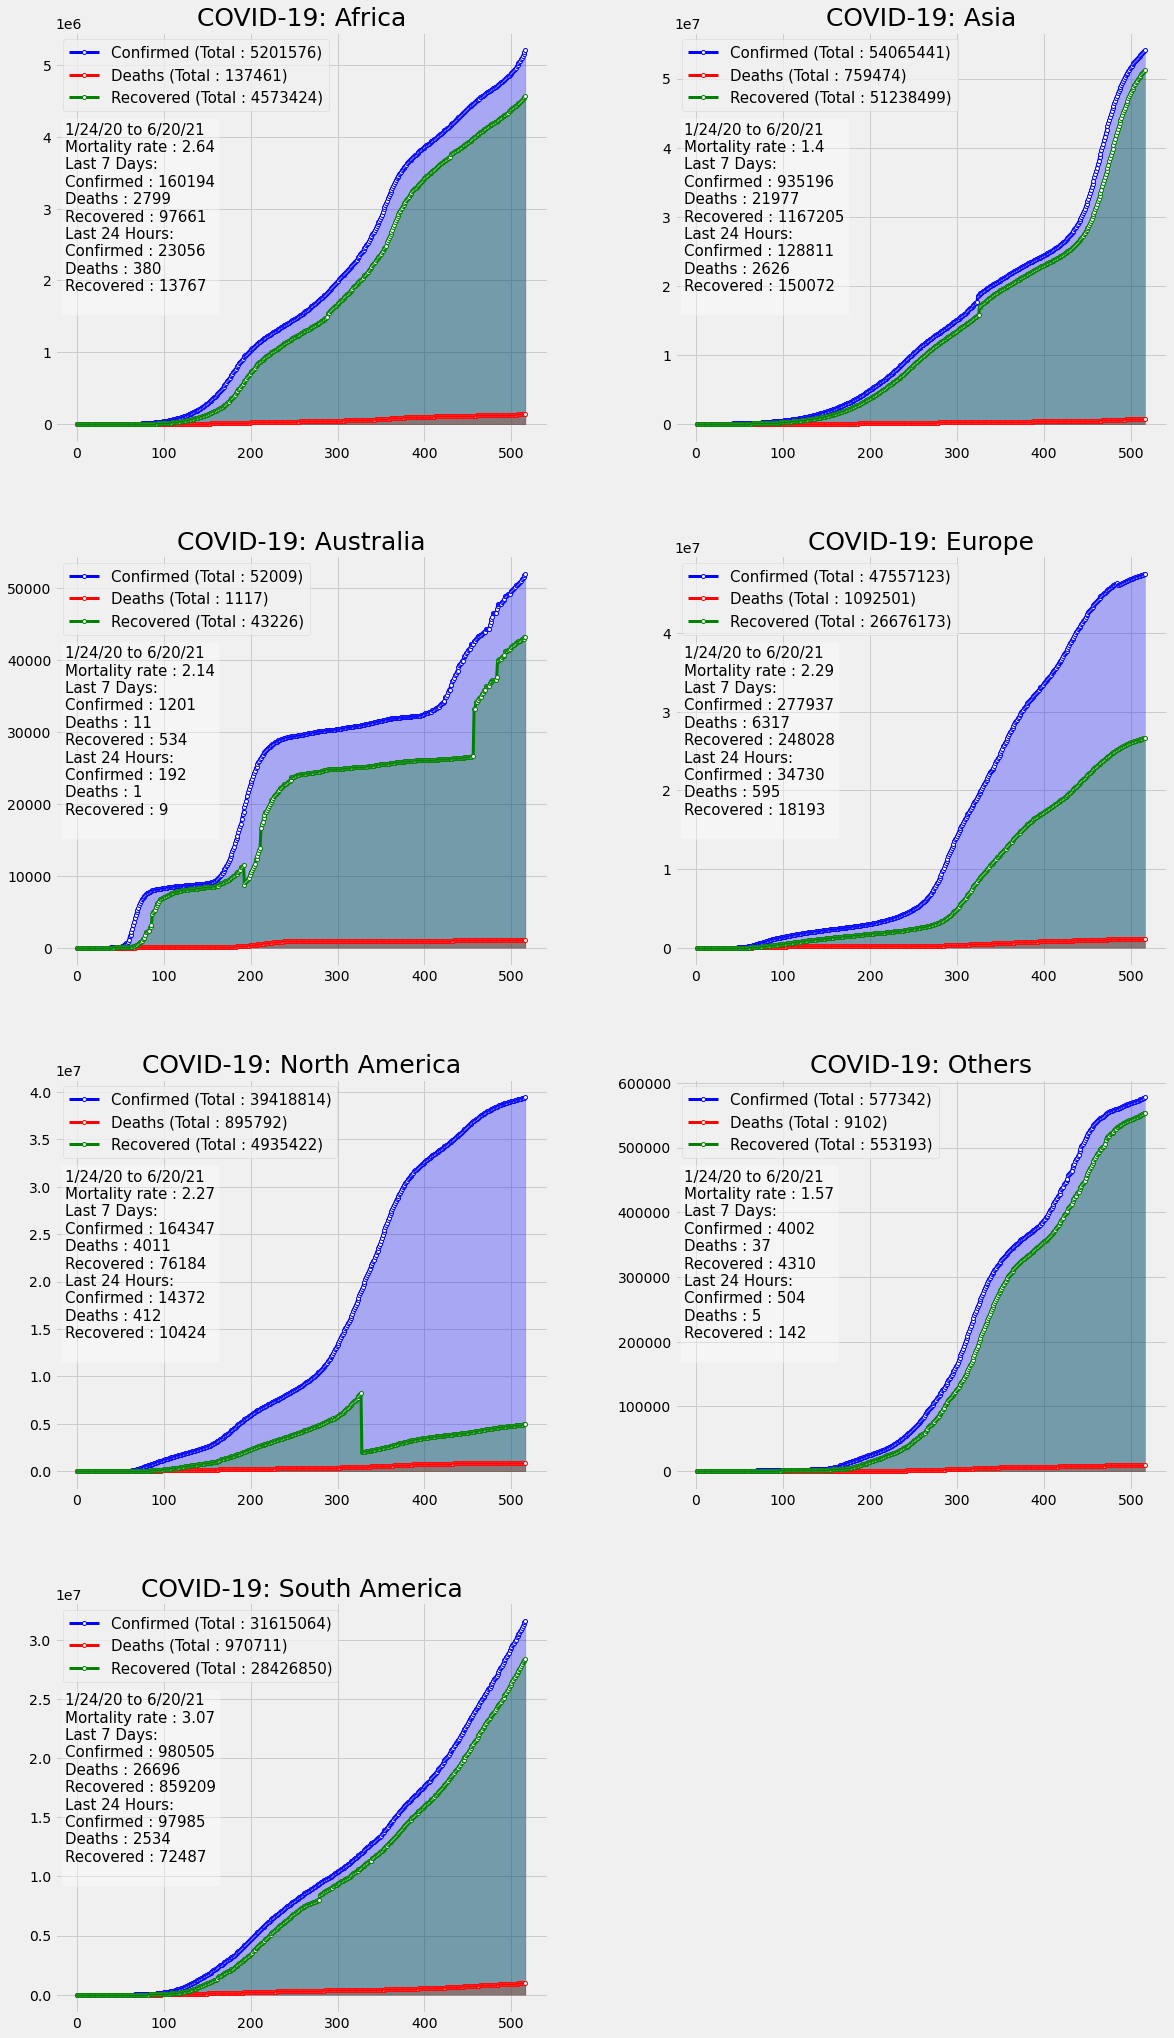

In [29]:
# visualize:
df_continents = confirmed_df.groupby(["Continent"]).sum()

df_contients = df_continents.sort_values(df_continents.columns[-1],ascending = False)
continents_list = df_continents.index

cols = 2
rows = round(continents_list.shape[0]/cols)
f = plt.figure(figsize=(20,8*rows))

for i,cont in enumerate(continents_list):
    visualize_covid_cases_2(confirmed_df, deaths_df, recoveries_df,
                          Continent= cont , country = None , state = None, period = None, 
                          figure = [f,rows,cols, i+1],
                          scale = "linear")
plt.show()

# Problem 12
    Visualize the covariance matrix for continents_df.

<AxesSubplot:>

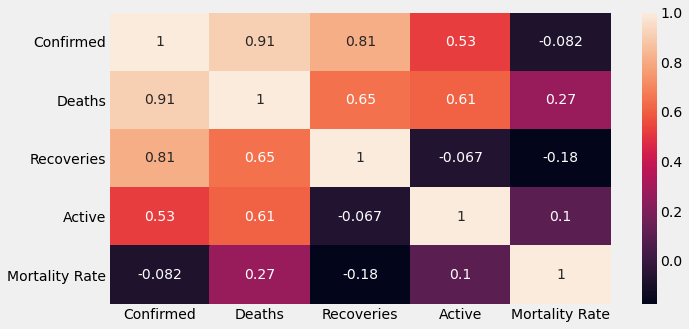

In [30]:
#Insert your code here:
plt.figure(figsize=(10,5))
sns.heatmap(continents_df[["Confirmed","Deaths","Recoveries","Active","Mortality Rate"]].corr(), annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

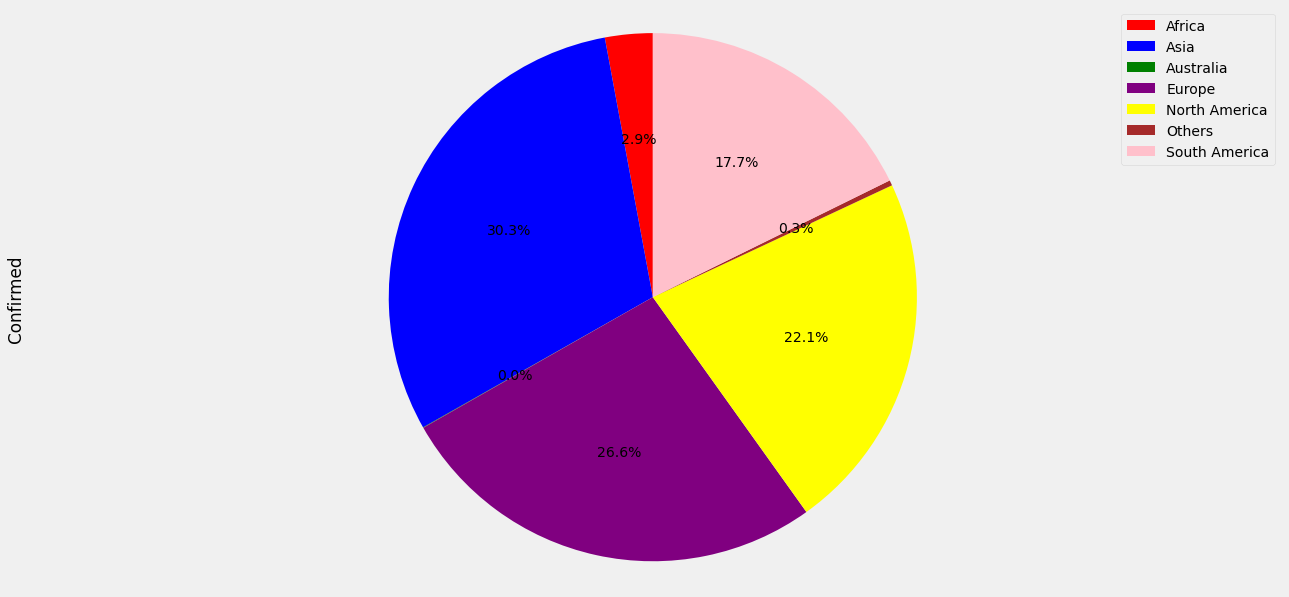

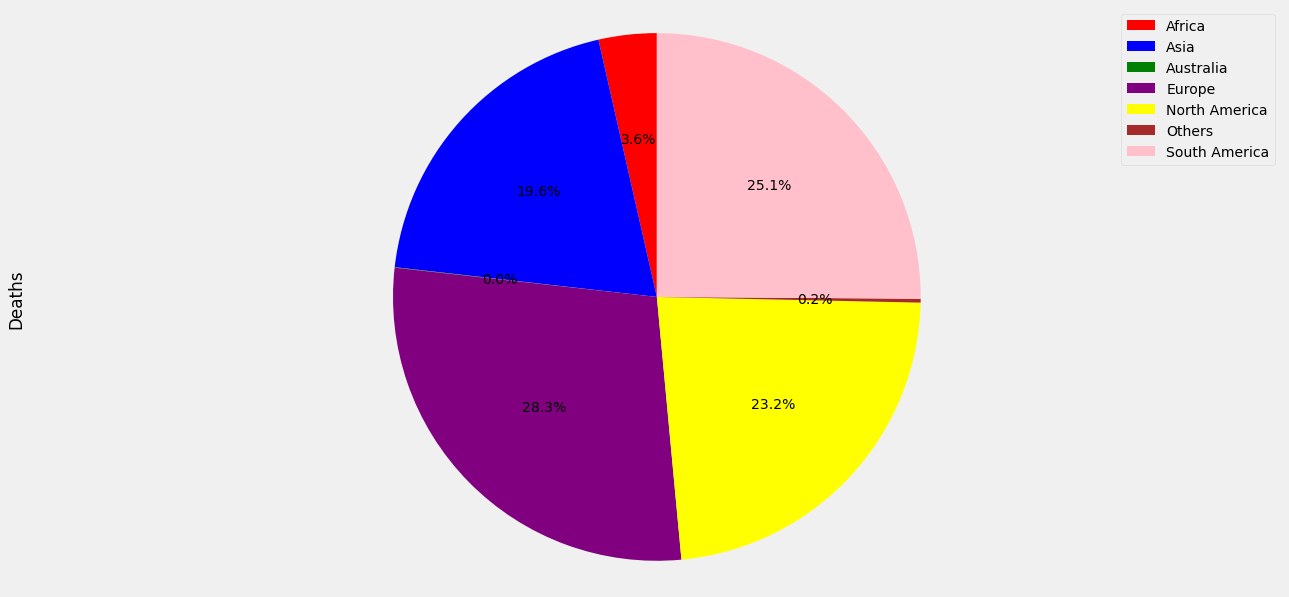

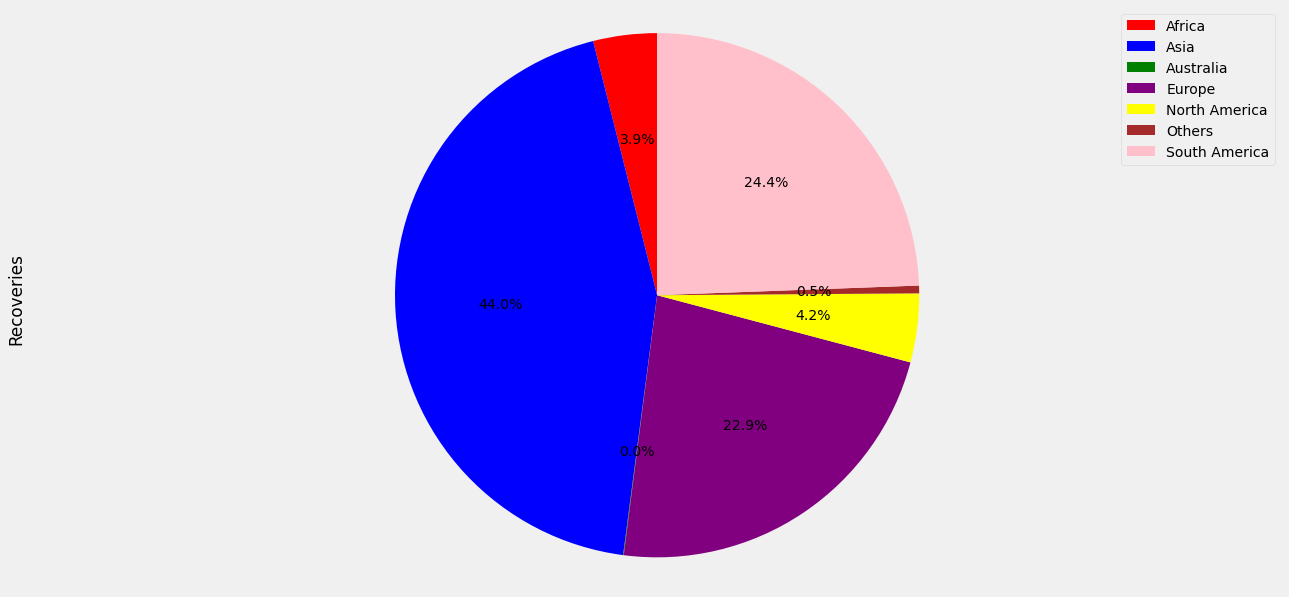

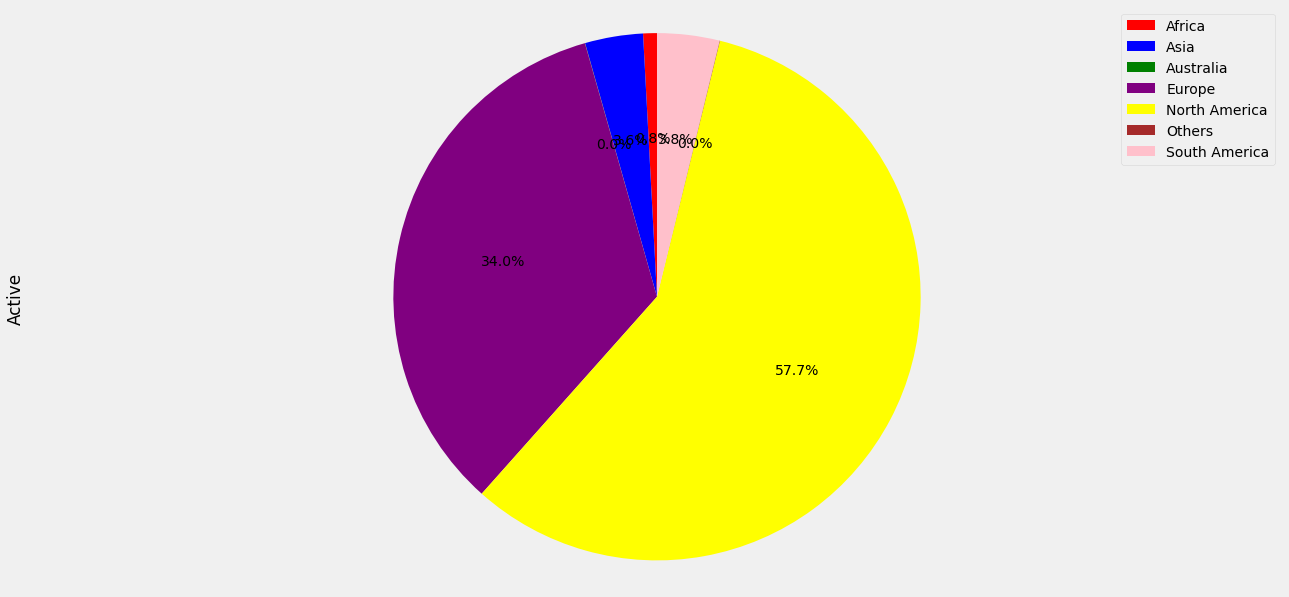

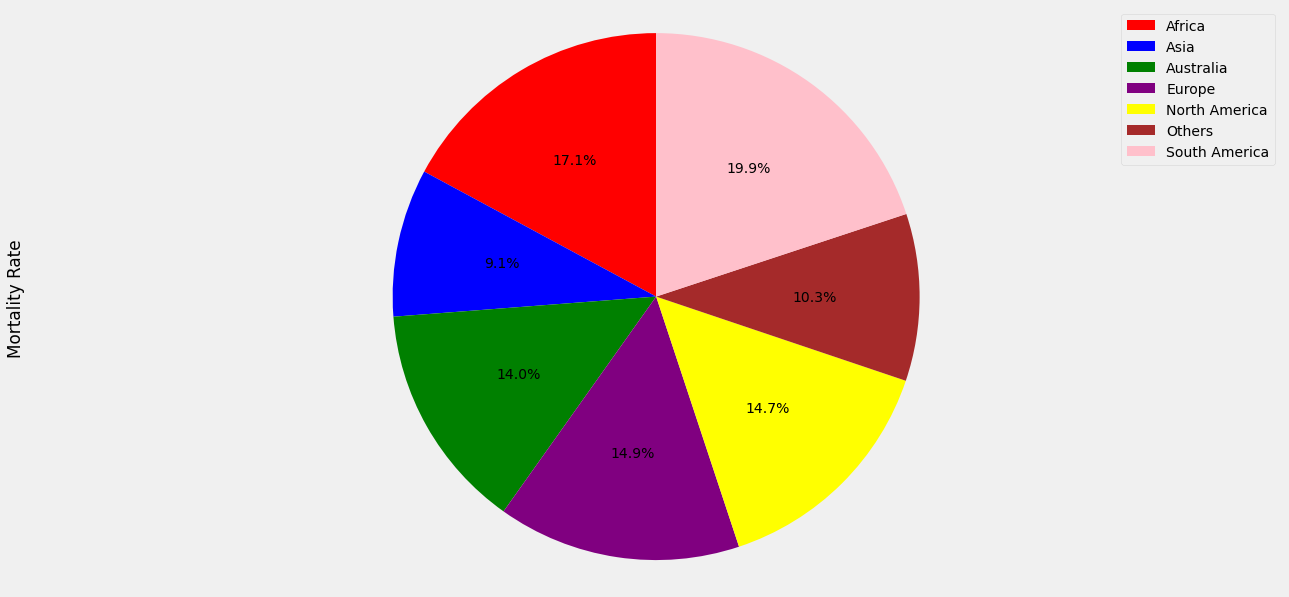

In [34]:
#Insert your code here:
color_list=["red","blue","green","purple","yellow","brown","pink"]

for i in continents_df:
    continents_df[i].plot(kind="pie", figsize=(20,10), autopct="%1.1f%%",
                          startangle=90,labels=None, colors= color_list)
    
    plt.legend(labels=continents_df.index, loc='upper right') 
    plt.axis('equal')
    plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [27]:
#Insert your code here:
confirmed_df.dropna(subset=["Lat","Long"],axis=0, inplace=True)


#visualize map
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)

for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
        tooltip="<h5>"+confirmed_df.iloc[i]['Country/Region']+"</h5>"+
                "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                "<li>Deaths:   "+str(deaths_df.iloc[i,-1])+"</li>"+
                "<li>Mortality Rate:   "+str(np.round(deaths_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))
                +"</li>"+ "</ul>",
        popup="Click here",
        radius=(int((np.log10(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color = 'darkorange',
        fill_color = 'lightorange',
        fill=True).add_to(world_map)

world_map

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [28]:
countries_df.head()

Confirmed  Deaths  Recoveries  Active  Mortality_Rate
Country/Region                                                       
Afghanistan         93288    3683       62397   27208            3.95
Albania            132476    2454      129888     134            1.85
Algeria            134458    3598       93586   37274            2.68
Andorra             13836     127       13633      76            0.92
Angola              37094     847       31003    5244            2.28

In [29]:
#Insert your code here:

countries_list=countries_df.index

World_map=px.choropleth(countries_df, locations=countries_list,locationmode="country names",
                       color=np.log10(countries_df["Active"]),hover_name=countries_list, hover_data=["Active"],
                       projection="natural earth")
World_map


/Users/nguyenhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/Users/nguyenhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [30]:
#Insert your code here:
top10_countries= countries_df.sort_values(by="Confirmed",ascending= False).head(10)
top10_countries

Confirmed  Deaths  Recoveries    Active  Mortality_Rate
Country/Region                                                         
USA              33498468  600653           0  32897815            1.79
India            29700313  381903    28491670    826740            1.29
Brazil           17628588  493693    15569556   1565339            2.80
France            5809319  110740      400796   5297783            1.91
Turkey            5348249   48950     5215654     83645            0.92
Russia            5189260  125443     4772575    291242            2.42
United Kingdom    4605805  128190       15563   4462052            2.78
Italy             4248432  127153     4019424    101855            2.99
Argentina         4198620   87261     3791979    319380            2.08
Colombia          3829879   97560     3564286    168033            2.55

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

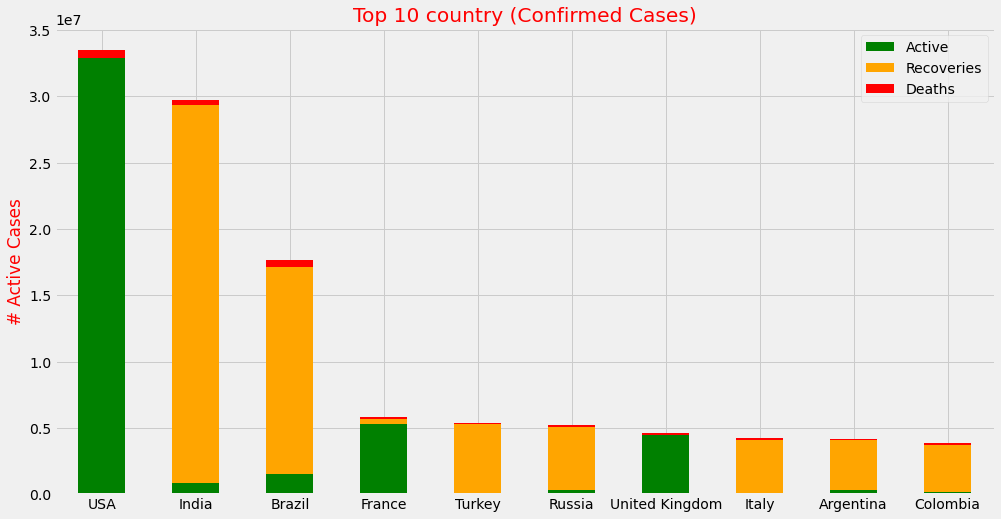

In [31]:
#Insert your code here:
ax = top10_countries[["Active","Recoveries","Deaths"]].plot(kind="bar",stacked=True,figsize=(15,8), 
                                                            color=["Green","orange","red"],rot=0)
ax.set_xlabel("",color="red")
ax.set_ylabel("# Active Cases",color= "Red")
ax.set_title("Top 10 country (Confirmed Cases)", color="red")
ax.legend()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

Answer: No, the COVID 2019 epidemic in the world has not reached its peak yet Because We still don't have enough vaccine to prevent the epidemic for the whole community so the epidemic will continue to spread and this number will continue to increase .

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [32]:
continents_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
Continent                                                              
Africa           5101570   135860     4510914    454796            2.66
Asia            53535314   748554    50615888   2170872            1.40
Australia          51282     1107       42930      7245            2.16
Europe          47397396  1089128    26571374  19736894            2.30
North America   39329315   893537     4895190  33540588            2.27
Others            574988     9083      550895     15010            1.58
South America   31050317   955728    27962611   2131978            3.08

In [33]:
continents_df["Recovery_Rate"]= round(continents_df["Recoveries"]/continents_df["Confirmed"]*100,2)
continents_df.reset_index(inplace=True)


cont_highest_death_rate= continents_df.loc[continents_df["Mortality Rate"]==continents_df["Mortality Rate"].max()
                                          ,"Continent"]
cont_highest_recovery_rate= continents_df.loc[continents_df["Recovery_Rate"]==continents_df["Recovery_Rate"].max()
                                          ,"Continent"]

# Print result:
print("19.1: The continent has the highest death rate over continents' active cases is "
      ,cont_highest_death_rate)
print("19.3: The continent has the highest recoveries rate over continents' dataset is "
      ,cont_highest_recovery_rate)

19.1: The continent has the highest death rate over continents' active cases is  6    South America
Name: Continent, dtype: object
19.3: The continent has the highest recoveries rate over continents' dataset is  5    Others
Name: Continent, dtype: object


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [ ]:
countries_df.tail()

In [ ]:
countries_df["Recovery_Rate"]= round(countries_df["Recoveries"]/countries_df["Confirmed"]*100,2)
countries_df.reset_index(inplace=True)

highest_death_rate= countries_df.loc[countries_df["Mortality_Rate"]==countries_df["Mortality_Rate"].max()
                                          ,"Country/Region"]
highest_recovery_rate= countries_df.loc[countries_df["Recovery_Rate"]==countries_df["Recovery_Rate"].max()
                                          ,"Country/Region"]

print("19.1: The country has the highest death rate over countries' dataset  is "
      ,highest_death_rate)
print("19.3: The country has the highest recoveries rate over countries' dataset is "
      ,highest_recovery_rate)

# Problem 21
**USA dataset**

In [35]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [36]:
us_medical_data["Recovery_Rate"]= round(us_medical_data["Recovered"]/us_medical_data["Confirmed"]*100,2)
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21789.0     1     915.282617       455095.0   
1       1184      16      548.0    598.0     2     158.841903       123753.0   
2          0       0        NaN      0.0    60       0.000000          696.0   
3     101455    1829    11836.0  87790.0     4    1393.858286       873294.0   
4      24253     292    17834.0   6127.0     5     803.663856       344968.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.243861  84000001  USA   9281.620008   
1                  NaN        1.376936  84000002  USA  16916.662680   
2                  NaN             NaN        16  ASM   1250.876152   
3               5188.0        1.802770  84000004  USA   8488.322873   
4               1575.0        1.203975  84000005  USA  11431.093603   

   Hospitalization_Rate  Recovery_Rate  
0              6.493159          49.15  
1                   NaN          46.28  
2                   NaN            NaN  
3              5.113597          11.67  
4              6.494042          73.53

In [37]:
#Insert your code here:
Stats_highest_death_rate= us_medical_data.loc[us_medical_data["Mortality_Rate"]==us_medical_data["Mortality_Rate"].max()
                                          ,"Province_State"]
Stats_highest_recovery_rate= us_medical_data.loc[us_medical_data["Recovery_Rate"]==us_medical_data["Recovery_Rate"].max()
                                          ,"Province_State"]

print("19.1: The State has the highest death rate over states' dataset is: ",  Stats_highest_death_rate)
print("19.3: The State has the highest recoveries rate over states' dataset is: ", Stats_highest_recovery_rate)

19.1: The State has the highest death rate over states' dataset is:  7    Connecticut
Name: Province_State, dtype: object
19.3: The State has the highest recoveries rate over states' dataset is:  27    Minnesota
Name: Province_State, dtype: object


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.